# Data Analysis and Clean-up for Portland Oregon Metropolitan Region
---



## 1 Download Data Set

In [436]:
!wget https://portal.its.pdx.edu/static/files/fhwa/FreewayData.zip

--2020-06-30 08:00:30--  https://portal.its.pdx.edu/static/files/fhwa/FreewayData.zip
Resolving portal.its.pdx.edu (portal.its.pdx.edu)... 131.252.209.4, 2610:10:20:209::4
Connecting to portal.its.pdx.edu (portal.its.pdx.edu)|131.252.209.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102227389 (97M) [application/zip]
Saving to: ‘FreewayData.zip’

FreewayData.zip     100%[===================>]  97.49M  5.23MB/s    in 18s     

2020-06-30 08:00:49 (5.31 MB/s) - ‘FreewayData.zip’ saved [102227389/102227389]



In [437]:
!unzip FreewayData.zip -d data

Archive:  FreewayData.zip
 extracting: data/FreewayData/arterial.zip  
  inflating: data/FreewayData/freeway_detectors.csv  
  inflating: data/FreewayData/freeway_loopdata.csv  
  inflating: data/FreewayData/freeway_loopdata15min.csv  
  inflating: data/FreewayData/freeway_loopdata1hr.csv  
  inflating: data/FreewayData/freeway_loopdata5min.csv  
  inflating: data/FreewayData/freeway_stations.csv  
  inflating: data/FreewayData/highways.csv  


## 2 Import Dependencies

In [438]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## 3 Preview the data

In [439]:
data = pd.read_csv("/content/data/FreewayData/freeway_loopdata1hr.csv")

* **detectorid**: Id of the detector (key)
* **starttime**: Start time of the time interval represented by this data (key)

* **volume**: 1-hour volume for this detector
* **speed**: 1-hour average speed for this detector (mph)
* **occupancy**: 1-hour average occupancy for this detector (percent)
* **countreadings**: the number of readings received from this detector during the time interval
* **vmt**: 1-hour vehicle miles travelled for this detector (miles)
* **vht**: 1-hour vehicle hours travelled for this detector (hours)
* **delay**: 1-hour delay for this detector (minutes)
* **traveltime**: 1-hour travel time for this detector (minutes)

In [440]:
print(data.columns.values)

['detectorid' 'starttime' 'volume' 'speed' 'occupancy' 'countreadings'
 'vmt' 'vht' 'delay' 'traveltime']


In [441]:
data.head()

,detectorid,starttime,volume,speed,occupancy,countreadings,vmt,vht,delay,traveltime
0,1345,2011-09-15 04:00:00-07,20,59.15,0.11,46,18.80,0.32,0.01,0.95
1,1345,2011-09-15 15:00:00-07,1431,60.27,7.60,180,1345.14,22.32,0.00,0.94
2,1345,2011-09-15 16:00:00-07,1190,50.60,8.52,180,1118.60,22.11,0.17,1.11
3,1345,2011-09-15 17:00:00-07,1446,58.73,8.11,180,1359.24,23.14,0.02,0.96
4,1345,2011-09-16 01:00:00-07,24,59.29,0.03,179,22.56,0.38,0.01,0.95


In [442]:
data.tail()

,detectorid,starttime,volume,speed,occupancy,countreadings,vmt,vht,delay,traveltime
94852,1954,2011-11-13 23:00:00-08,407,60.85,1.74,180,622.71,10.23,0.0,1.51
94853,1954,2011-11-14 03:00:00-08,127,60.58,0.47,180,194.31,3.21,0.0,1.52
94854,1954,2011-11-15 01:00:00-08,131,60.29,0.55,179,200.43,3.32,0.0,1.52
94855,1954,2011-11-15 02:00:00-08,120,61.40,0.40,180,183.60,2.99,0.0,1.50
94856,1954,2011-11-15 05:00:00-08,601,60.33,3.37,180,919.53,15.24,0.0,1.52


### 3.1 Preview generate descriptive statistics

In [443]:
data.describe(include=['O'])

,starttime
count,94857
unique,1473
top,2011-10-10 13:00:00-07
freq,69


In [444]:
data.describe()

,detectorid,volume,speed,occupancy,countreadings,vmt,vht,delay,traveltime
count,94857.000000,94857.000000,92212.000000,94857.000000,94857.000000,88965.000000,69783.000000,69783.000000,69783.000000
mean,1568.314368,680.684884,43.914591,4.214262,177.821479,785.475689,18.354187,0.134444,1.369849
std,248.079191,493.233370,25.862597,5.057523,13.497627,796.308794,18.341797,1.600402,1.669331
min,1345.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.010000,0.000000,0.560000
25%,1374.000000,225.000000,21.290000,0.000000,180.000000,76.140000,5.570000,0.000000,0.860000
50%,1406.000000,620.000000,57.935000,2.560000,180.000000,561.460000,14.600000,0.010000,1.240000
75%,1856.000000,1094.000000,61.280000,7.010000,180.000000,1262.480000,26.100000,0.070000,1.770000
max,1956.000000,3374.000000,91.000000,78.410000,180.000000,4294.980000,1267.270000,370.230000,370.910000


### 3.2 Check if contain blank, null or empty values

In [445]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94857 entries, 0 to 94856
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   detectorid     94857 non-null  int64  
 1   starttime      94857 non-null  object 
 2   volume         94857 non-null  int64  
 3   speed          92212 non-null  float64
 4   occupancy      94857 non-null  float64
 5   countreadings  94857 non-null  int64  
 6   vmt            88965 non-null  float64
 7   vht            69783 non-null  float64
 8   delay          69783 non-null  float64
 9   traveltime     69783 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 7.2+ MB


In [446]:
data.isnull().values.any()

True

In [447]:
data.isnull().sum()

detectorid           0
starttime            0
volume               0
speed             2645
occupancy            0
countreadings        0
vmt               5892
vht              25074
delay            25074
traveltime       25074
dtype: int64

### 3.3. Missing Data in Bar Chart

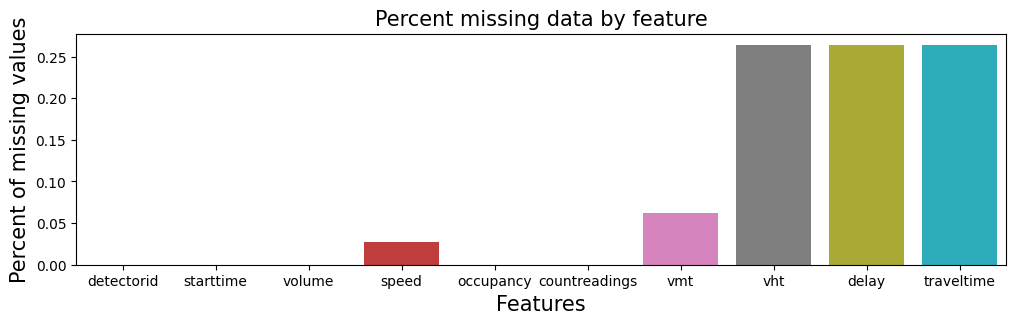

In [448]:
total = data.isnull().sum()
percent = data.isnull().sum()/data.isnull().count()

missing_data = pd.concat([total,percent], axis=1, keys=['total', 'percent'])
ax = plt.subplots(figsize=(12, 3))
sns.barplot(x = missing_data.index, y = missing_data['percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

### 3.4 Using Missingno approach
https://github.com/ResidentMario/missingno

#### I. Bar Chart
The `msno.bar` is a simple visualization of nullity by column

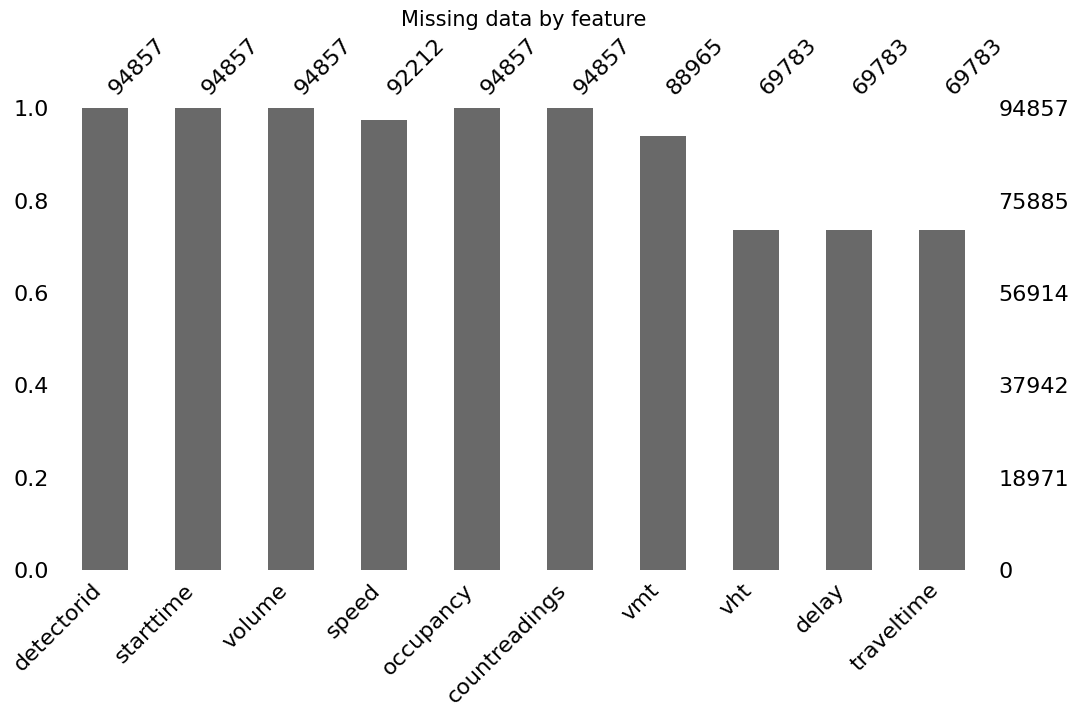

In [449]:
msno.bar(data, figsize=(12,6))
plt.title('Missing data by feature', fontsize=15)
plt.show()

#### II. Heatmap
The `msno.heatmap` measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another

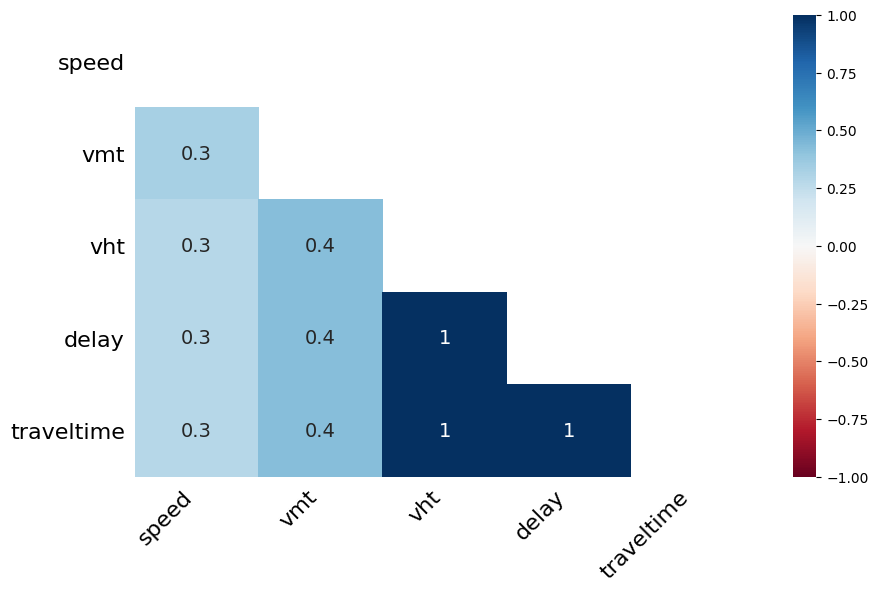

In [450]:
msno.heatmap(data,figsize=(10,6))

#### III. Dendrogram
The `msno.dendrogram` allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap

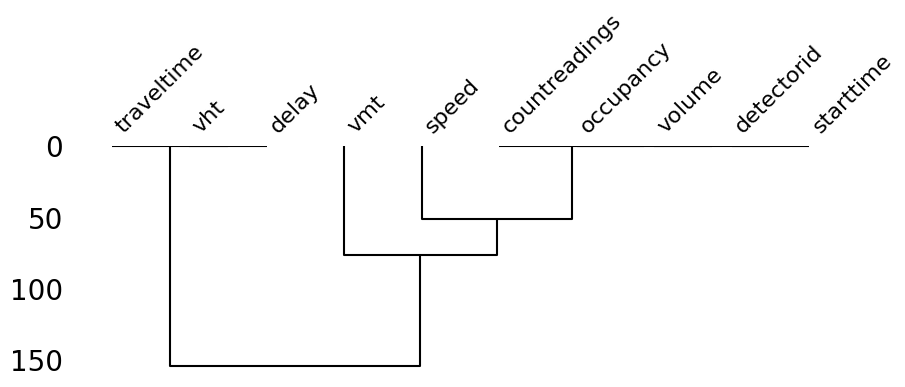

In [451]:
msno.dendrogram(data, figsize=(10,3))

#### IV. Matrix
The `msno.matrix` nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

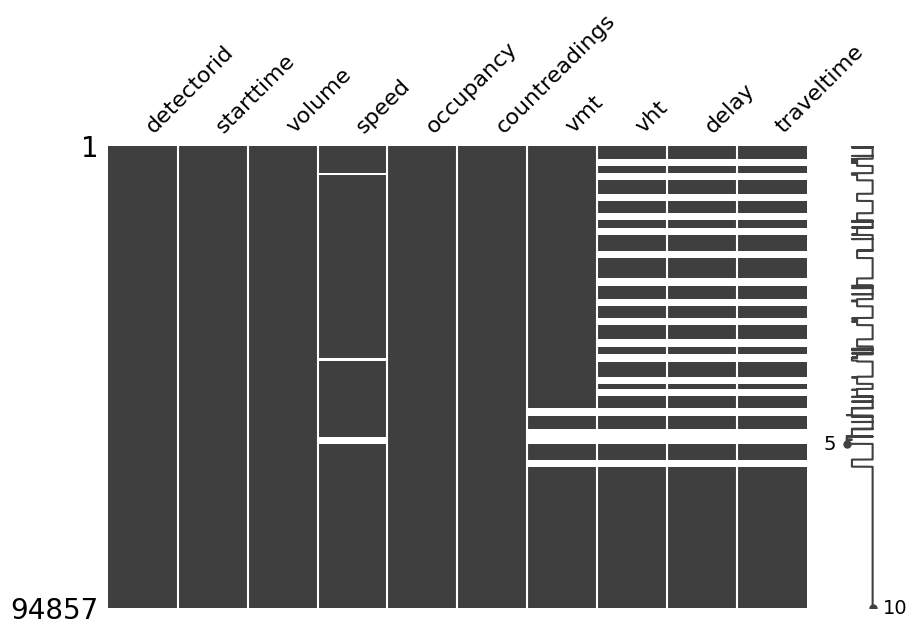

In [452]:
msno.matrix(data, figsize=(10,6))

### 4 Data cleaning

### 4.1 Replacing With Mean

In [453]:
cleaning_flag = True

In [454]:
if cleaning_flag:
  data["speed"] = data["speed"].fillna(data["speed"].mean())
  data["vmt"] = data["vmt"].fillna(data["vmt"].mean())
  data["vht"] = data["vht"].fillna(data["vht"].mean())
  data["delay"] = data["delay"].fillna(0.0)
  data["traveltime"] = data["traveltime"].fillna(data["traveltime"].mean())

### 4.2 Check if their is not any missing value

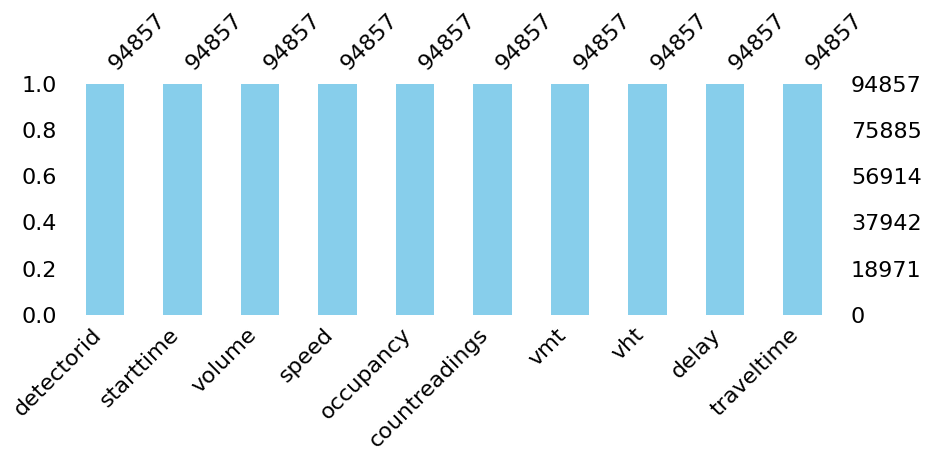

In [455]:
msno.bar(data, figsize=(10,3), color="skyblue")
plt.show()

In [456]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94857 entries, 0 to 94856
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   detectorid     94857 non-null  int64  
 1   starttime      94857 non-null  object 
 2   volume         94857 non-null  int64  
 3   speed          94857 non-null  float64
 4   occupancy      94857 non-null  float64
 5   countreadings  94857 non-null  int64  
 6   vmt            94857 non-null  float64
 7   vht            94857 non-null  float64
 8   delay          94857 non-null  float64
 9   traveltime     94857 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 7.2+ MB


In [457]:
data.isnull().sum()

detectorid       0
starttime        0
volume           0
speed            0
occupancy        0
countreadings    0
vmt              0
vht              0
delay            0
traveltime       0
dtype: int64

## 5 Exploratory data analysis

### 5.1 Speed Distribution

data[0:9485]


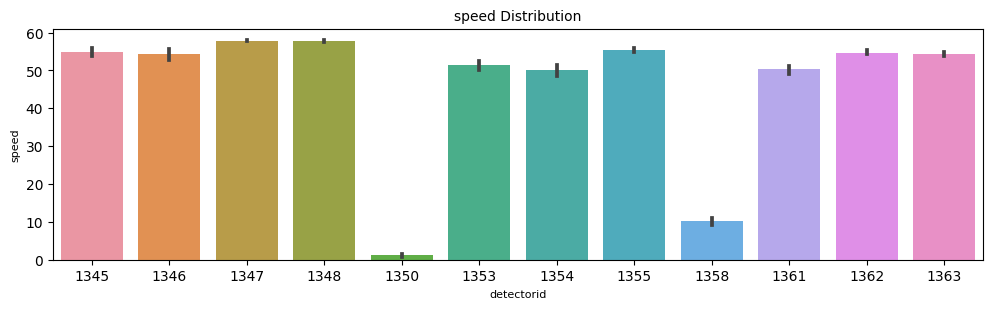

data[9486:18971]


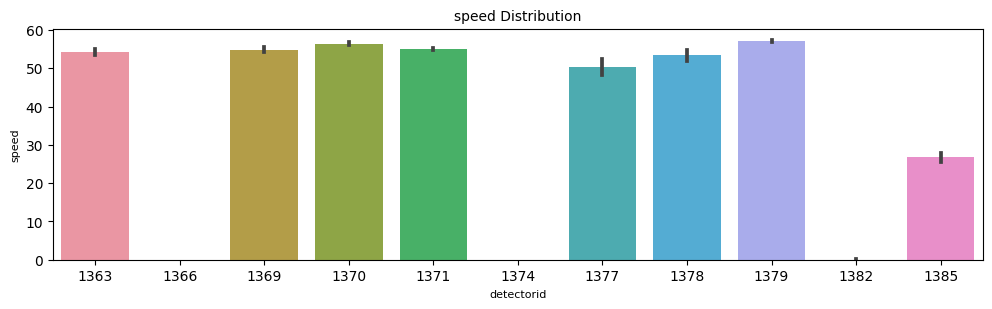

data[18972:28457]


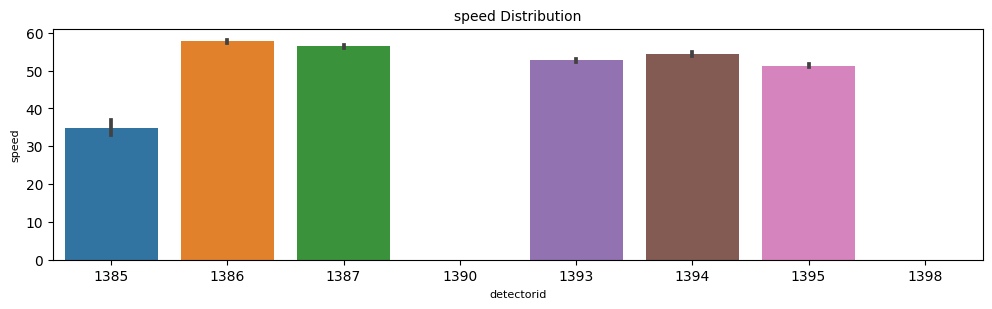

data[28458:37943]


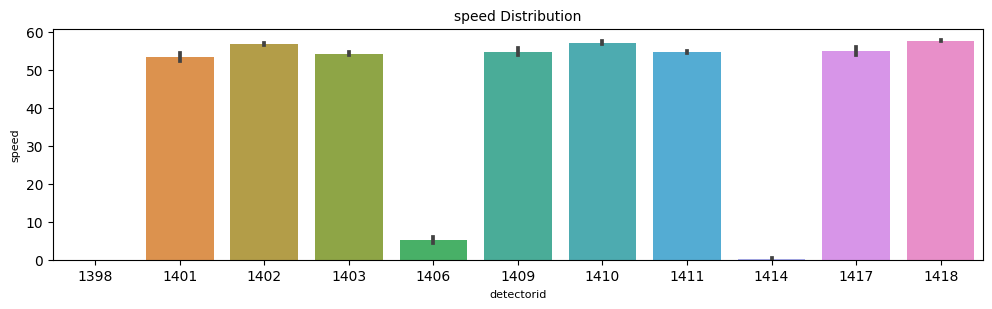

data[37944:47429]


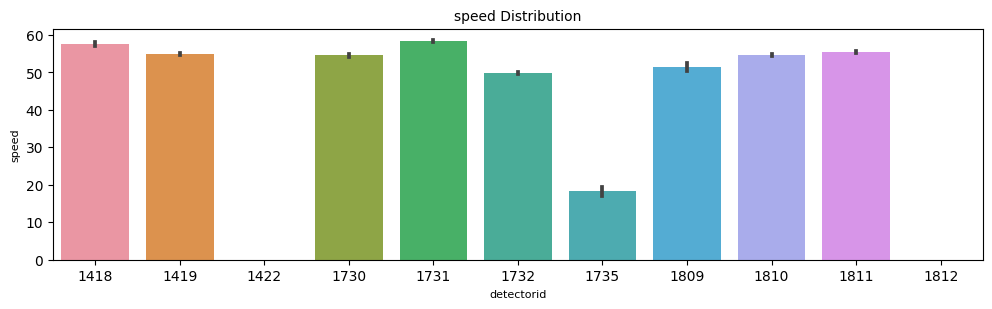

data[47430:56915]


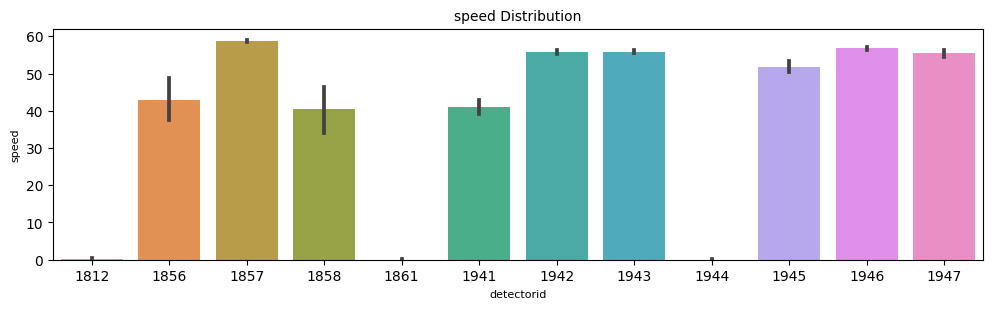

data[56916:66401]


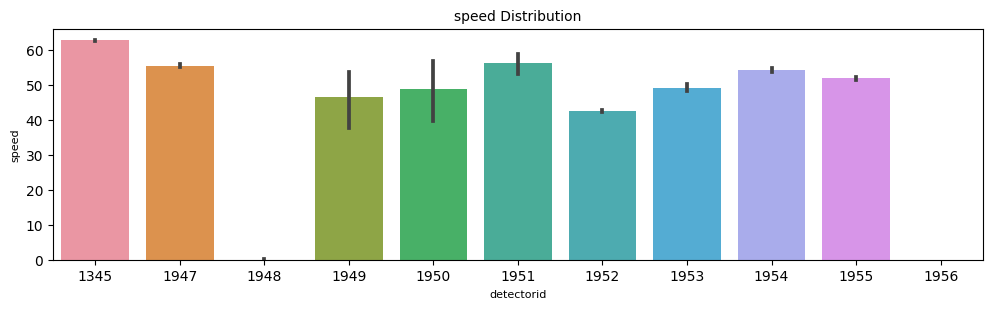

data[66402:75886]


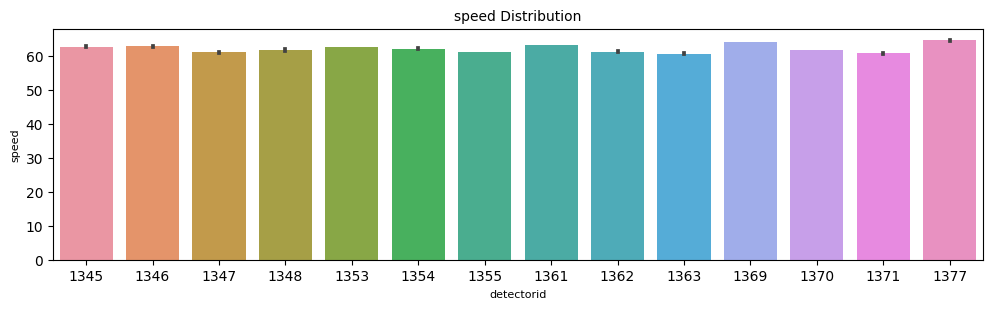

data[75887:85371]


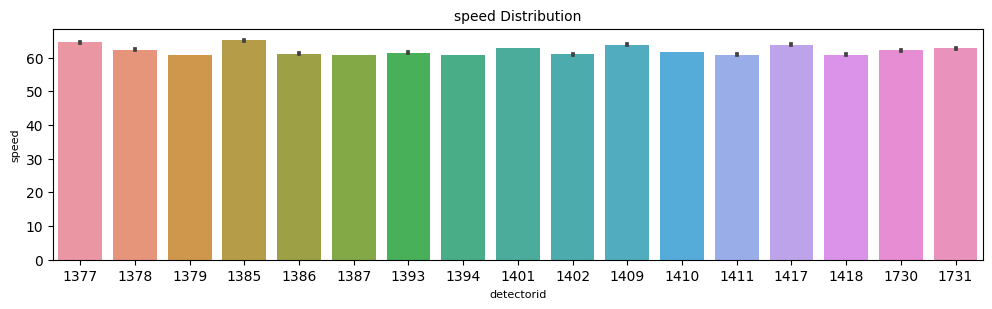

data[85372:94856]


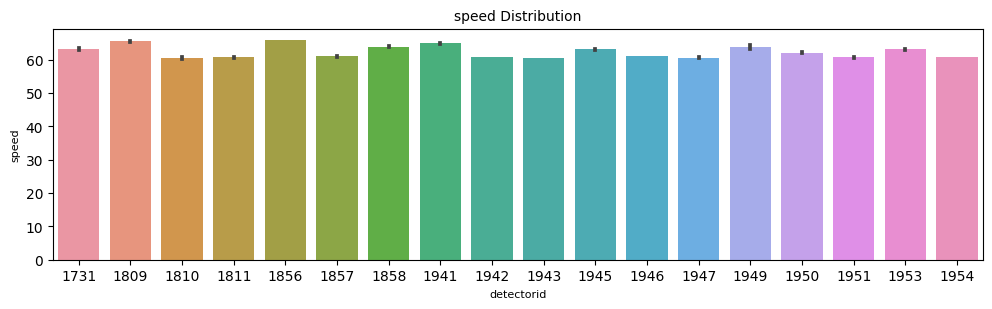

In [458]:
x = np.array_split(range(len(data)), 10)
for i in x:
  print("data["+str(i[0])+":"+str(i[-1])+"]")
  ax = plt.subplots(figsize=(12, 3))
  sns.barplot(x = "detectorid", y = "speed", data=data[i[0]:i[-1]])
  plt.title("speed Distribution", fontsize =10)
  plt.ylabel("speed", fontsize = 8)
  plt.xlabel("detectorid",fontsize = 8)
  plt.show()

### 5.2 Volume Distribution

data[0:9485]


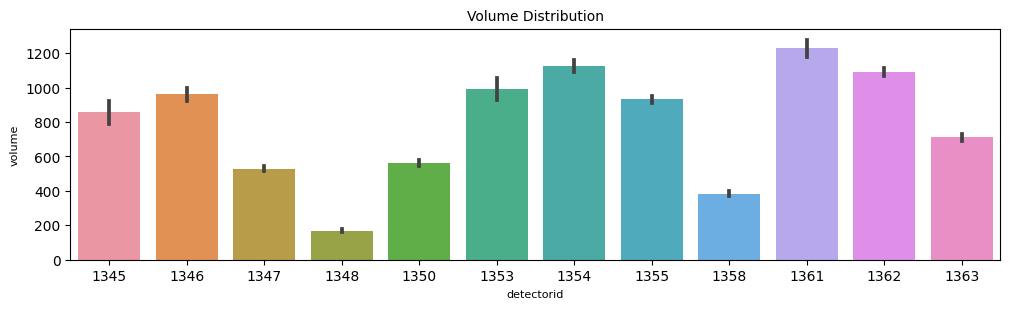

data[9486:18971]


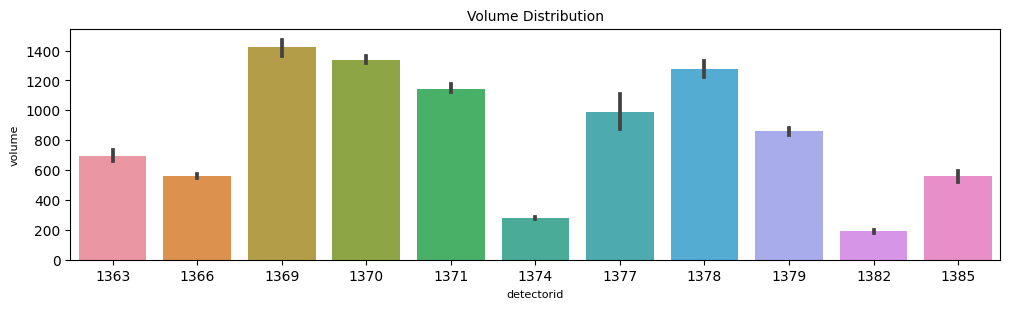

data[18972:28457]


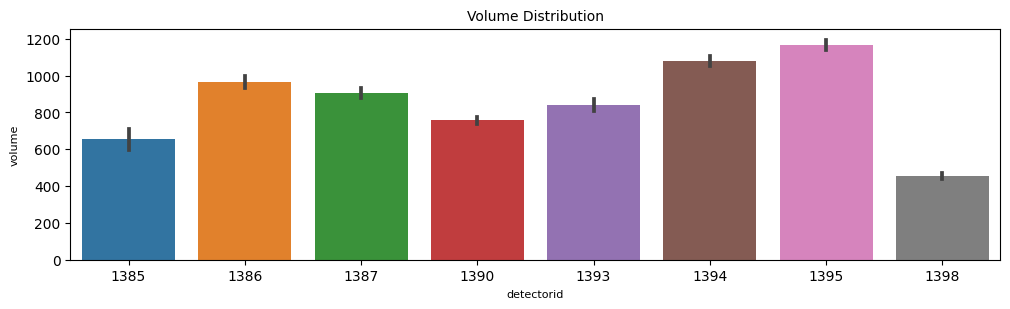

data[28458:37943]


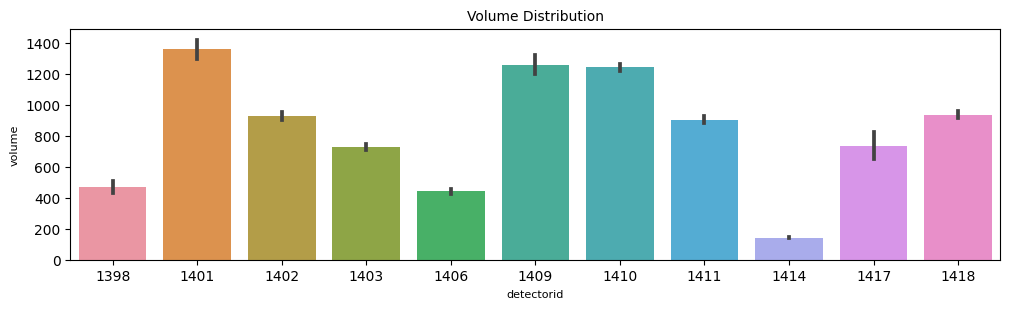

data[37944:47429]


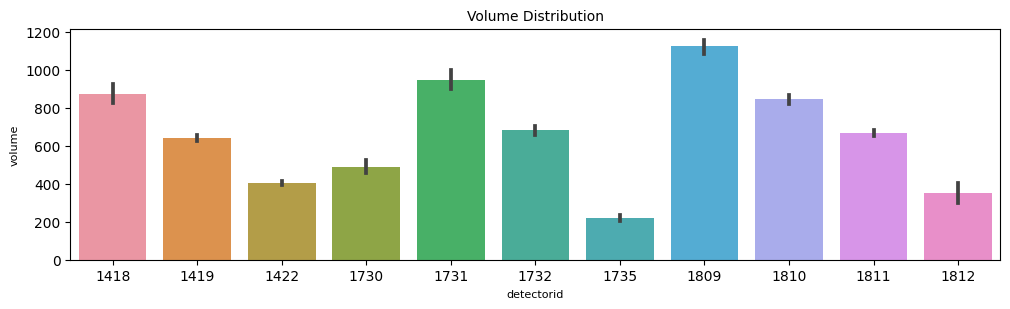

data[47430:56915]


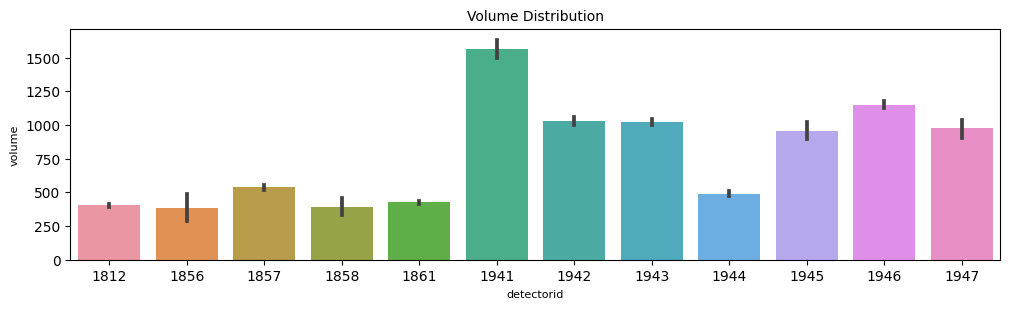

data[56916:66401]


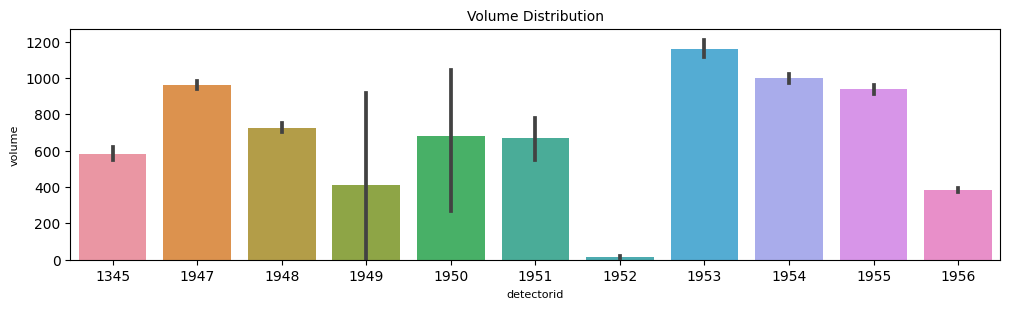

data[66402:75886]


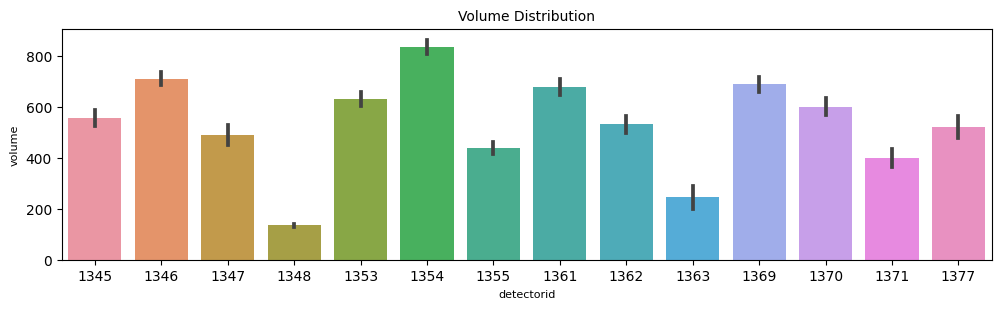

data[75887:85371]


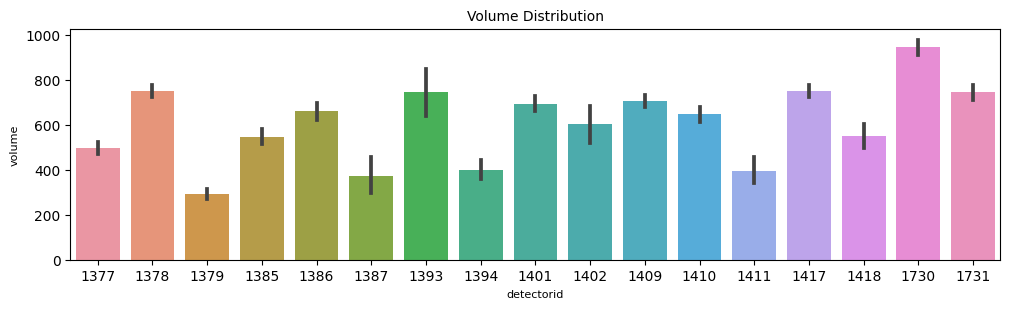

data[85372:94856]


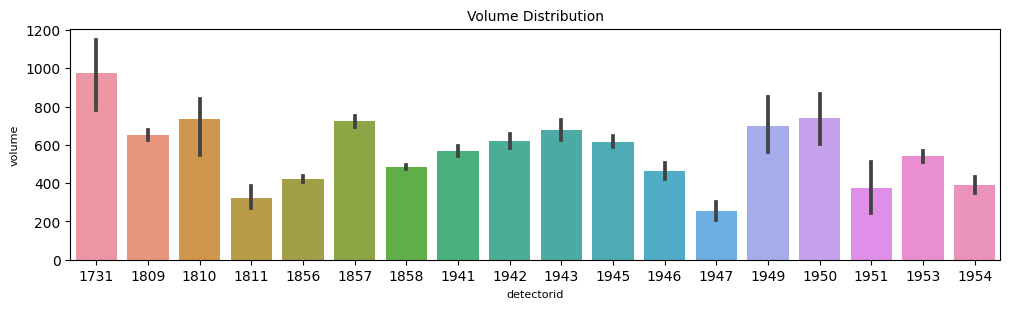

In [459]:
x = np.array_split(range(len(data)), 10)
for i in x:
  print("data["+str(i[0])+":"+str(i[-1])+"]")
  ax = plt.subplots(figsize=(12, 3))
  sns.barplot(x = "detectorid", y = "volume", data=data[i[0]:i[-1]])
  plt.title("Volume Distribution", fontsize =10)
  plt.ylabel("volume", fontsize = 8)
  plt.xlabel("detectorid",fontsize = 8)
  plt.show()